# Paper Plots


## Fitting
### Loading Modules

In [1]:
include("../src/ModuleLEPEE.jl")
using .ModuleLEPEE;
using Plots;

## 3 points for curve shape

R=[43, 41, 39]
LT=[1.5, 3.5, 6.0]
Coeffs=[8.971734327678098e20 -12.67675290642382]
R=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
LT=[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 16.74997467837835, 11.83506483104322, 8.440148828417069, 6.072164427732623, 4.405120099801771, 3.221172343160386, 2.3732650564777287, 1.7611664876243718, 1.3159303745115818, 0.9897143467344933]
R=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
D=[1.1146116943242142e-21, 7.298043837697546e-18, 1.2458674739185623e-15, 4.77847524193144e-14, 8.087115193155964e-13, 8.157455629542683e-12, 5.75734997917276e-1

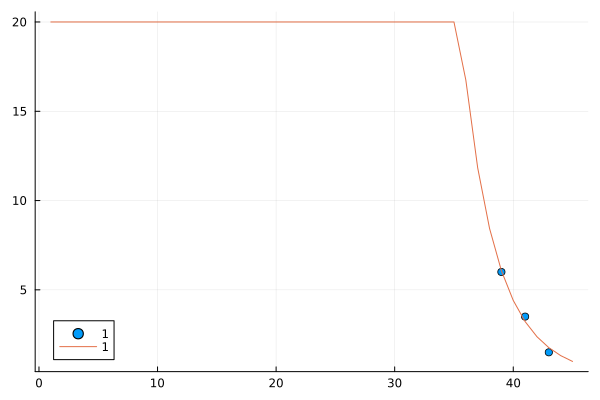

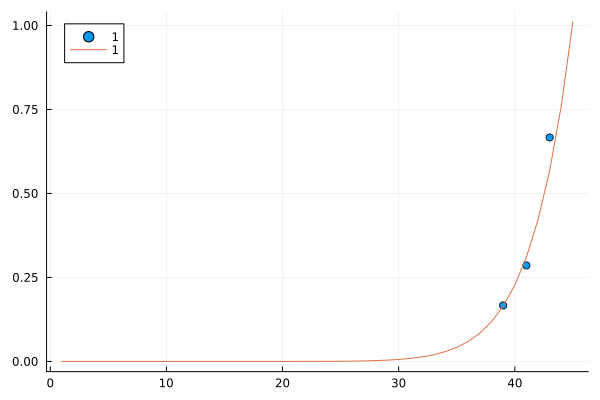

In [2]:
R = [43, 41, 39];
LT = [1.5, 3.5, 6 ];
fit = fit_curve(LT, R);
println("R=",R)
println("LT=",LT)
println("Coeffs=",fit.minimizer)


Rnum = collect(1:1:45)
LTnum = fit.minimizer[1] .* ( Rnum .^ fit.minimizer[2])
LTnum = clamp.(LTnum,0,20)


fig_fit = plot();
scatter!(fig_fit,R, LT, label="1")
plot!(fig_fit,Rnum, LTnum, label="1")
display(fig_fit)
println("R=",Rnum)
println("LT=",LTnum)


Dnum = inv(fit.minimizer[1]) .* ( Rnum .^ -fit.minimizer[2])


fig_fit_D = plot();
scatter!(fig_fit_D,R, 1 ./LT, label="1")
plot!(fig_fit_D,Rnum, Dnum, label="1")
display(fig_fit_D)
println("R=", Rnum)
println("D=", Dnum)


45-element Vector{Int64}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10
  ⋮
 37
 38
 39
 40
 41
 42
 43
 44
 45

## Different materials

### Loading Data

In [3]:
R1 = [38.13,41.85,44.64];
#LT1 = [4.52237,2.84436,2.18664];
LT1 = [2.05856,1.34025,0.995347];
dsdbest1(diameter) = dsdbest(diameter, T=856, mu=-0.8, sigma=1.2);
windTSR1(m)= windTSR(m,(tsr=6,rmax=93.0/2,cutin=4,cutout=25,minrs=6,maxrs=16), (mu=10.85, k=2));

R2 = [38.13,41.85,44.64];
#LT2 = [0.837001,0.627187,0.513462];
LT2 = [0.451388,0.338237,0.276906];
dsdbest2(diameter) = dsdbest(diameter, T=856, mu=-0.8, sigma=1.2);
windTSR2(m)= windTSR(m,(tsr=6,rmax=93.0/2,cutin=4,cutout=25,minrs=6,maxrs=16), (mu=10.85, k=2));


println("Cw1(7.5) = ",windTSR1(7.5))
println("Cr1 = ",C_dsd(dsdbest1))

println("Cw2(7.5) = ",windTSR2(7.5))
println("Cr2 = ",C_dsd(dsdbest2))


Cw1(7.5) = 31.597044471976986
Cr1 = 12.529253242189073
Cw2(7.5) = 31.597044471976986
Cr2 = 12.529253242189073


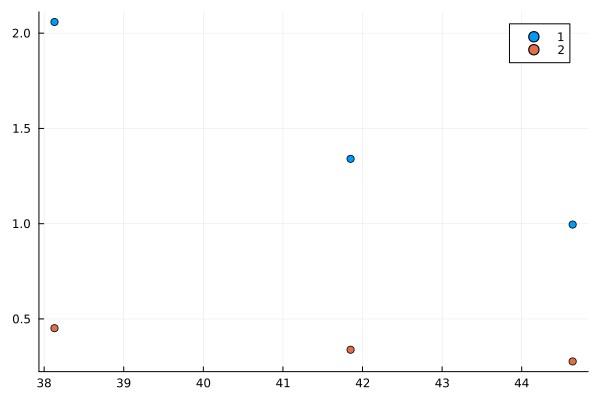

In [4]:
fig_orig = plot();
scatter!(fig_orig,R1, LT1, label="1")
scatter!(fig_orig,R2, LT2, label="2")

display(fig_orig)

### Fitting



In [5]:
println("1");
fit_1 = fit_curve(LT1, R1);
res1 = (A=fit_1.minimizer[1], B= fit_1.minimizer[2]);
println("LT = ", res1.A, " R ^ ", res1.B);
println("A = ", res1.A);
println("B = ", res1.B);
coeff1 = coeffs(fit_1, dsdbest1, windTSR1);
println(coeff1);

println("2");
fit_2 = fit_curve(LT2, R2);
res2 = (A=fit_2.minimizer[1], B= fit_2.minimizer[2]);
println("LT = ", res2.A, " R ^ ", res2.B);
println("A = ", res2.A);
println("B = ", res2.B);
coeff2 = coeffs(fit_2, dsdbest2, windTSR2);
println(coeff2);



1
LT = 4.010877803400016e7 R ^ -4.610022737543354
A = 4.010877803400016e7
B = -4.610022737543354
(m = 3.6100227375433542, Cw = 4.9180453644935085, Cd = 12.529253242189073, M = 26070.070073627157)
2
LT = 36014.46953634182 R ^ -3.0999999301023786
A = 36014.46953634182
B = -3.0999999301023786
(m = 2.0999999301023786, Cw = 2.5294662765310365, Cd = 12.529253242189073, M = 1.0075370168681073e6)


### Plot fitting 


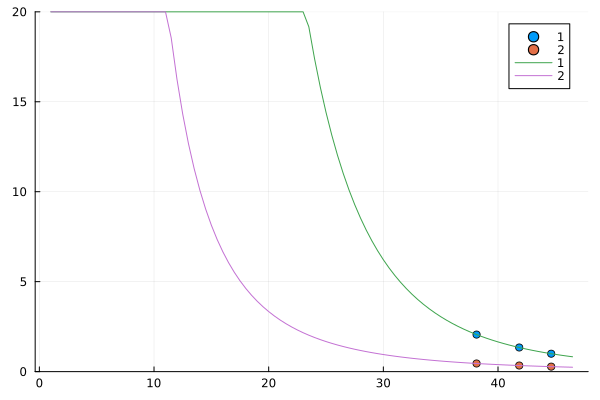

1.0:0.5:46.5
[20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.16838002935797, 17.395392161949204, 15.81802274530977, 14.411334714993354, 13.153981228772105, 12.0276317731716, 11.016498784609597, 10.106945698325767, 9.287161234211583, 8.546887775856197, 7.877194093761778, 7.270284554051606, 6.719338452815462, 6.2183743096201995, 5.762134907765466, 5.345989634574402, 4.96585129188507, 4.618105045697957, 4.299547588669091, 4.007334918676098, 3.7389374058849043, 3.4921010413600158, 3.2648139416213224, 3.0552773330886343, 2.8618803640149046, 2.6831781940582258, 2.5178728969187394, 2.3647967825681597, 2.2228978050364114, 2.0912267715306965, 1.96892611050837, 1.8552199915635421, 1.749405619730468, 1.650845551968157, 1.5589609049227406, 1.473225341188477, 1.393159736719274

In [6]:
fig_fit=plot(ylims=(0,20))
scatter!(fig_fit,R1,LT1,label="1")
scatter!(fig_fit,R2,LT2,label="2")
r_sample=1:0.5:46.5;
t_sample_1=res1.A .* (r_sample .^ res1.B );
t_sample_1=clamp.(t_sample_1,0,20);
plot!(fig_fit,r_sample,t_sample_1, label="1")
t_sample_2=res2.A .* (r_sample .^ res2.B );
t_sample_2=clamp.(t_sample_2,0,20);
plot!(fig_fit,r_sample,t_sample_2, label="2")
display(fig_fit)

println(r_sample)
println(t_sample_1)
println(t_sample_2)

## DSD plots

### Loading Modules

In [2]:
include("../src/ModuleLEPEE.jl")
using .ModuleLEPEE;
using Plots;

In [13]:
dsdbestDenmark(diameter) = dsdbest(diameter, T=772.03, mu=-2.37, sigma=1.55);
dsdbestSweden(diameter) = dsdbest(diameter, T=629.34, mu=-2.66, sigma=1.55);
dsdbestGlasgow(diameter) = dsdbest(diameter, T=1383.05, mu=-2.23, sigma=1.5);


d=collect(0.1:0.1:6)
y_Den=dsdbestDenmark(d);
y_Swe=dsdbestSweden(d);
y_Gla=dsdbestGlasgow(d);

println(d)
println(y_Den)
println(y_Swe)
println(y_Gla)


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0]
[1283.9708297212037, 369.25583847042753, 170.8703071054749, 94.48640714946572, 56.98837083288141, 36.07876560559515, 23.53575088635418, 15.668203102510999, 10.587276364073025, 7.238065504723484, 4.996101466945903, 3.4768478297323133, 2.436831502234021, 1.7186729338636453, 1.218984552464508, 0.8689478774233739, 0.6222461854591348, 0.4474097553410021, 0.32287760074732164, 0.2337668866067677, 0.16973453197205185, 0.12354742263802487, 0.09011793717267158, 0.0658481917867978, 0.048180967133893526, 0.03529012602194935, 0.02586586741785135, 0.01896489470730164, 0.013905298057503988, 0.010192419992377438, 0.007466310885950337, 0.005464309711722217, 0.003994275545154972, 0.002915355960146038, 0.0021

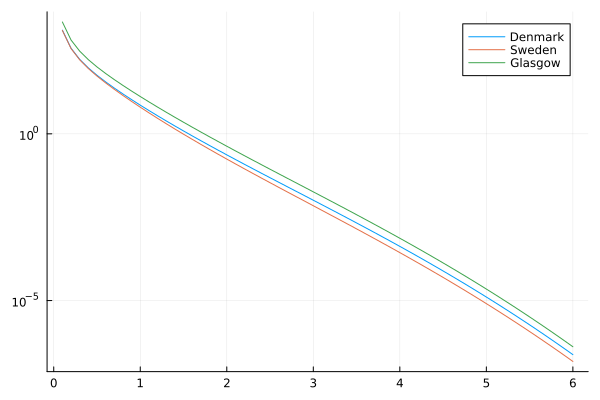

In [10]:

fig_dsd=plot()
plot!(fig_dsd,d,y_Den,yaxis=:log,label="Denmark")
plot!(fig_dsd,d,y_Swe,yaxis=:log,label="Sweden")
plot!(fig_dsd,d,y_Gla,yaxis=:log,label="Glasgow")